In [1]:
import numpy as np
import pandas as pd

df_sms = pd.read_csv('data/Data/spam.csv')

In [2]:
df = df_sms[['v1', 'v2']].copy()
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Text Preprocessing 1
Method :
1. converting to lower case
1. contraction
1. remove or convert number into text
1. remove punctuation
1. remove white spaces
1. remove stopwords and particular words

>### 1. Converting to Lower Case

In [4]:
def to_lower(text):
    return text.lower()

In [5]:
text_string = "Summer December 10th 2019 "
text_string = to_lower(text_string)
print(text_string)

summer december 10th 2019 


>## 2. Contraction

In [6]:
import re

In [7]:
contractions_dict = {     
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I had",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "iit will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so is",
"that'd": "that had",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there had",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they had",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [8]:
def expand_contractions(text, contractions_dict):
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contractions_dict.get(match) \
            if contractions_dict.get(match) \
            else contractions_dict.get(match.lower())
        expanded_contraction = expanded_contraction
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def main_contraction(text):
    text = expand_contractions(text, contractions_dict)
    return text

In [9]:
text_2 = "If ain't got you"
text_2 = main_contraction(text_2)
text_2

'If am not got you'

>### 3. Remove of Convert Number into Text

In [10]:
def remove_numbers(text):
    output = ''.join(c for c in text if not c.isdigit())
    return output

In [11]:
text_string = 'I was born in 1996'
text_string = remove_numbers(text_string)
text_string

'I was born in '

>### 4. Remove Punctuation

In [12]:
from string import punctuation

In [13]:
def remove_punct(text):
    return ''.join(c for c in text if c not in punctuation)

In [14]:
text_string = 'There was bobby, alex, fergi and I'
text_string = remove_punct(text_string)
text_string

'There was bobby alex fergi and I'

>### 5. Remove White Spaces

In [15]:
def to_strip(text):
    return ' '.join(text.split())

In [16]:
text_string = 'There was        bobby, alex,    fergi and I'
text_string = to_strip(text_string)
text_string

'There was bobby, alex, fergi and I'

>### 6. Remove Stopwords and Particular Words
Stopwords are words that occur too often and do not provide any additional insight
<br>
Stopwords example:
I, me, myself, we, our, ourselves, you, yourself, ….. 

In [17]:
import nltk
from nltk.corpus import stopwords

In [18]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [19]:
def remove_stopwords(sentence):
    stop_words = stopwords.words('english')
    stop_words.extend(['u', 'U', 'dun', 'ü', 'fr'])
    return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

# def remove_stopwords(sentence):
#     stop_words = stopwords.words('english').extend(['u', 'U', 'fr'])
#     return ' '.join([w for w in nltk.word_tokenize(sentence) if not w in stop_words])

In [20]:
text_string = "There was bobby, alex, fergie and I"
text_string = remove_stopwords(text_string)
print(text_string)

There bobby , alex , fergie I


In [21]:
# stop_words

In [22]:
stop_words = stopwords.words('english')
stop_words.extend(['u', 'U', 'dun', 'ü', 'fr'])

# Combine Preprocessing Method

In [23]:
pd.options.display.max_colwidth = None

In [24]:
df['message_prep1'] = df['message'].apply(to_lower)
df['message_prep2'] = df['message_prep1'].apply(main_contraction)
df['message_prep3'] = df['message_prep2'].apply(remove_numbers)
df['message_prep4'] = df['message_prep3'].apply(remove_punct)
df['message_prep5'] = df['message_prep4'].apply(to_strip)
df['message_prep6'] = df['message_prep5'].apply(remove_stopwords)

df


,label,message,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&cs apply 08452810075over18s,free entry in a wkly comp to win fa cup final tkts st may . text fa to to receive entry question(std txt rate)t&cs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though",nah i do not think he goes to usf he lives around here though,nah i do not think he goes to usf he lives around here though,nah think goes usf lives around though
...,...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the �750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the �750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the �750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the nd time we have tried contact u. u have won the � pound prize. claim is easy, call now! only p per minute. bt-national-rate.",this is the nd time we have tried contact u u have won the � pound prize claim is easy call now only p per minute btnationalrate,this is the nd time we have tried contact u u have won the � pound prize claim is easy call now only p per minute btnationalrate,nd time tried contact � pound prize claim easy call p per minute btnationalrate
5568,ham,Will �_ b going to esplanade fr home?,will �_ b going to esplanade fr home?,will �_ b going to esplanade fr home?,will �_ b going to esplanade fr home?,will � b going to esplanade fr home,will � b going to esplanade fr home,� b goin

# Text Preprocessing 2

### Stemming
The process of transforming to the dictionary base form.
caring, cares, cared, caringly carefully will be transformed into care, care, care caringly carefully.
caringly and carefully are listed in the dictionary.
purpose of lemmatization is also to reduce overfitting.

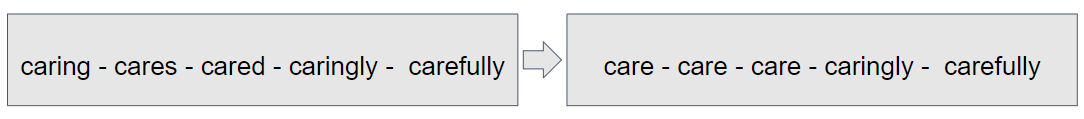

In [25]:
from nltk.stem import SnowballStemmer

In [26]:
snowball_stem = SnowballStemmer('english')

def stem(text):
    stemmed_word = [snowball_stem.stem(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(text)]
    return " ".join(stemmed_word)

In [27]:
text_1 = 'I am reading a book and the book is very fascinating. I am rethe book is very fascinating'
stem(text_1)

'i am read a book and the book is veri fascin . i am reth book is veri fascin i am read a book and the book is veri fascin . i am reth book is veri fascin'

>### Lemmatization

In [28]:
from nltk.stem import WordNetLemmatizer
wordnet_lemma = WordNetLemmatizer()

In [29]:
def lemmatize(text):
    lemma_word = [wordnet_lemma.lemmatize(word) for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    return " ".join(lemma_word)

>### Apply Stemming or Lemmatization

In [30]:
df['message_prep_stem'] = df['message_prep6'].apply(stem)
df['message_prep_lemma'] = df['message_prep6'].apply(lemmatize)

df

,label,message,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6,message_prep_stem,message_prep_lemma
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif oni,ok lar joke wif oni,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&cs apply 08452810075over18s,free entry in a wkly comp to win fa cup final tkts st may . text fa to to receive entry question(std txt rate)t&cs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs,free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli over,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,say early hor c already say,say earli hor c alreadi say,say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though",nah i do not think he goes to usf he lives around here though,nah i do not think he goes to usf he lives around here though,nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though
...,...,...,...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the �750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the �750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the �750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the nd time we have tried contact u. u have won the � pound prize. claim is easy, call now! only p per minute. bt-nationa

# Text Exploration

>### Word Frequency

In [31]:
import seaborn as sns

In [32]:
def kamus(check):
    check = check.str.extractall('([a-zA_Z]+)')
    check.columns = ['check']
    b = check.reset_index(drop=True)
    check = b['check'].value_counts()
    
    kamus = {'kata': check.index, 'freq': check.values}
    kamus = pd.DataFrame(kamus)
    kamus.index = kamus['kata']
    kamus.drop('kata', axis=1, inplace=True)
    kamus.sort_values('freq', ascending=False, inplace=True)
    
    return kamus

In [33]:
df.head()

,label,message,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6,message_prep_stem,message_prep_lemma
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif oni,ok lar joke wif oni,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&cs apply 08452810075over18s,free entry in a wkly comp to win fa cup final tkts st may . text fa to to receive entry question(std txt rate)t&cs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs,free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli over,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,say early hor c already say,say earli hor c alreadi say,say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though",nah i do not think he goes to usf he lives around here though,nah i do not think he goes to usf he lives around here though,nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though


In [34]:
kamus_unclean = kamus(df['message_prep_lemma'])

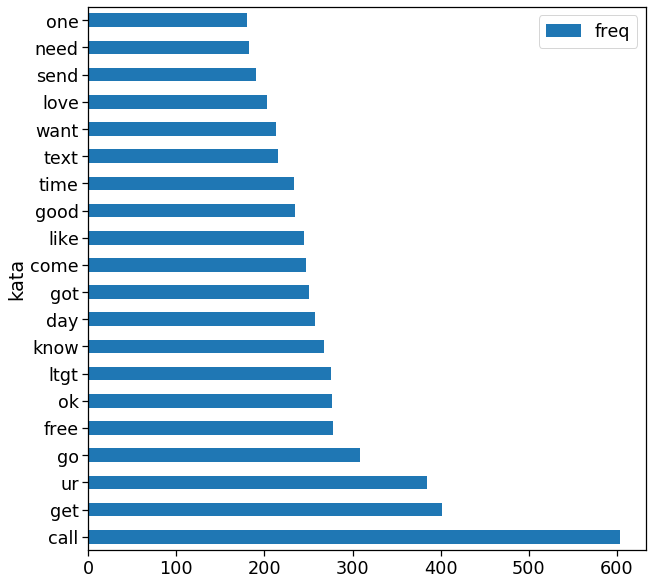

In [35]:
sns.set_context(context = 'notebook', font_scale = 1.6)
kamus_unclean[:20].plot(kind = 'barh',figsize = (10,10));

>### Word Cloud

In [36]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [37]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud)
    plt.axis('off')

In [38]:
word_cloud = WordCloud().generate(str(df['message_prep_lemma']))

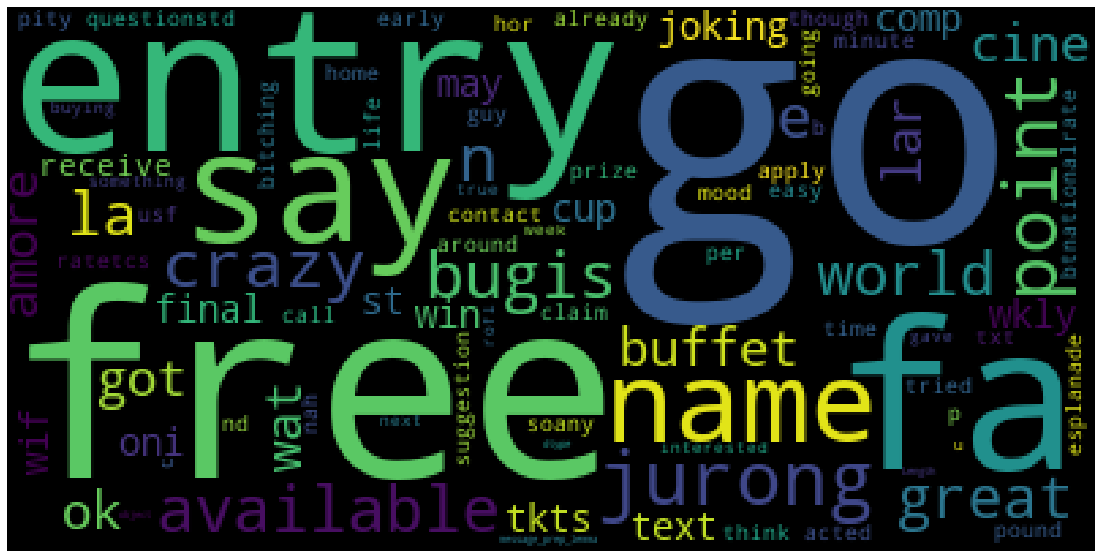

In [39]:
plot_cloud(word_cloud)

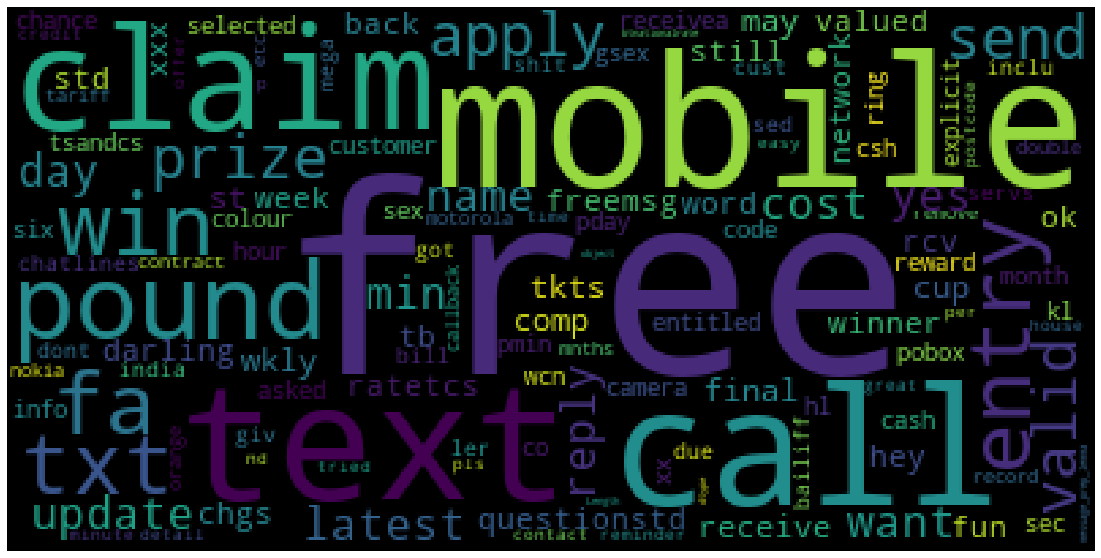

In [40]:
word_cloud_spam = WordCloud().generate(str(df[df['label'] == 'spam']['message_prep_lemma']))
plot_cloud(word_cloud_spam)

>### Length of Sentence

In [41]:
df['length'] = df['message'].apply(len)

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-

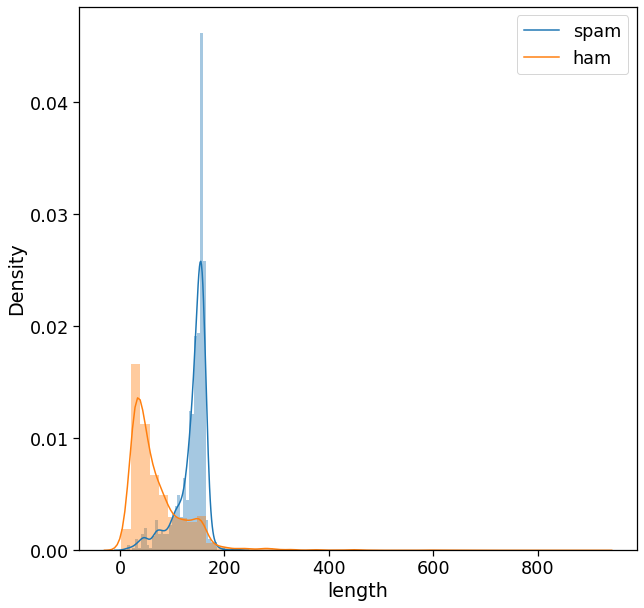

In [42]:
plt.figure(figsize=(10,10))

df_spam = df[df['label'] == 'spam']
df_ham = df[df['label'] == 'ham']

sns.distplot(df_spam['length'])
sns.distplot(df_ham['length'])

plt.legend(['spam', 'ham'])

plt.show()

In [43]:
df_ham[df_ham['length'] == df_ham['length'].max()]['message']

1084    For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..
Name: message, dtype: object

# Document Term Matrix
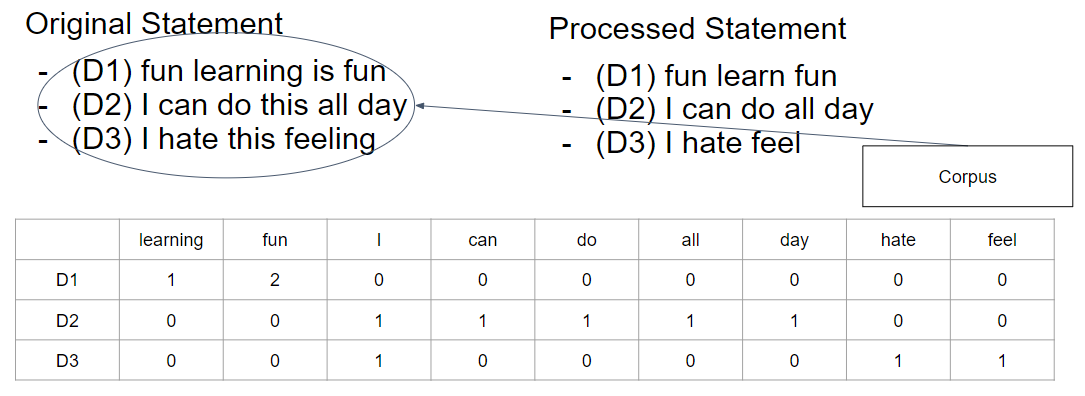

In [44]:
words_example = ["You already know me, don't you ?",
                 "I am the best there is",
                 "Already Know about that"]

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
vect = CountVectorizer()
vect.fit(words_example)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [47]:
print("Vocab Size: {}".format(len(vect.vocabulary_)))
print("Vocab Content: {}".format(vect.vocabulary_))

Vocab Size: 12
Vocab Content: {'you': 11, 'already': 1, 'know': 6, 'me': 7, 'don': 4, 'am': 2, 'the': 9, 'best': 3, 'there': 10, 'is': 5, 'about': 0, 'that': 8}


In [48]:
dtm = vect.transform(words_example)
dtm.toarray()

array([[0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 2],
       [0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0],
       [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]], dtype=int64)

In [49]:
vect.get_feature_names()

['about',
 'already',
 'am',
 'best',
 'don',
 'is',
 'know',
 'me',
 'that',
 'the',
 'there',
 'you']

In [50]:
dtm_df = pd.DataFrame(dtm.toarray(), columns=vect.get_feature_names())
dtm_df['text'] = words_example
dtm_df

,about,already,am,best,don,is,know,me,that,the,there,you,text
0,0,1,0,0,1,0,1,1,0,0,0,2,"You already know me, don't you ?"
1,0,0,1,1,0,1,0,0,0,1,1,0,I am the best there is
2,1,1,0,0,0,0,1,0,1,0,0,0,Already Know about that


>### Term Frequency (TF) - N-Grams

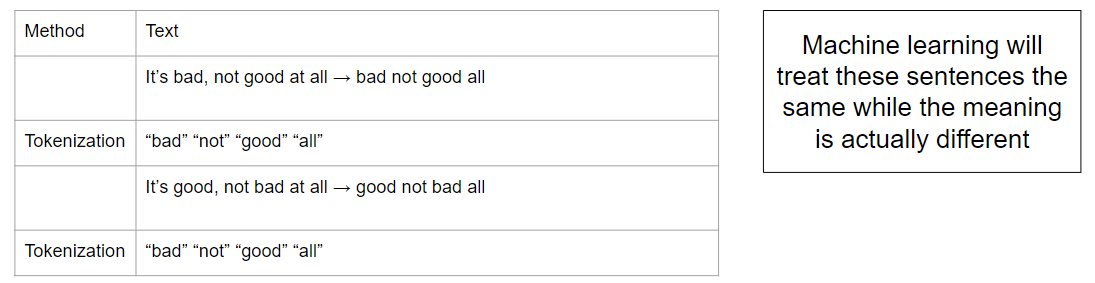

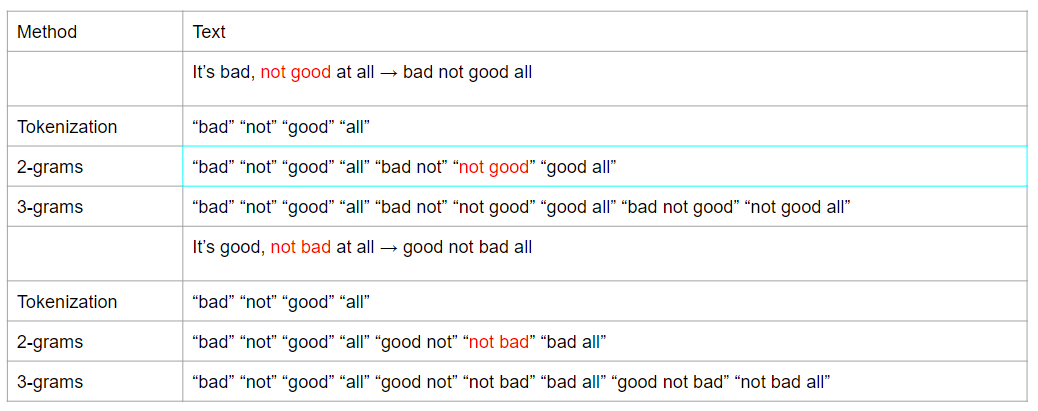

In [51]:
words_example

["You already know me, don't you ?",
 'I am the best there is',
 'Already Know about that']

In [52]:
vect_2gram = CountVectorizer(ngram_range=(1,2))
vect_2gram.fit(words_example)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [53]:
print("Vocab Size: {}".format(len(vect_2gram.vocabulary_)))
print("Vocab Content: {}".format(vect_2gram.vocabulary_))

Vocab Size: 23
Vocab Content: {'you': 21, 'already': 2, 'know': 11, 'me': 14, 'don': 8, 'you already': 22, 'already know': 3, 'know me': 13, 'me don': 15, 'don you': 9, 'am': 4, 'the': 17, 'best': 6, 'there': 19, 'is': 10, 'am the': 5, 'the best': 18, 'best there': 7, 'there is': 20, 'about': 0, 'that': 16, 'know about': 12, 'about that': 1}


In [54]:
dtm_2gram = pd.DataFrame(vect_2gram.transform(words_example).toarray(), columns=vect_2gram.get_feature_names())
dtm_2gram['text'] = words_example
dtm_2gram

,about,about that,already,already know,am,am the,best,best there,don,don you,...,me,me don,that,the,the best,there,there is,you,you already,text
0,0,0,1,1,0,0,0,0,1,1,...,1,1,0,0,0,0,0,2,1,"You already know me, don't you ?"
1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,1,1,1,1,0,0,I am the best there is
2,1,1,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Already Know about that


>### TF-IDF

rescale features by how informative we expect them to be.
give high weight to any term appear often in particular document, not in many documents.
tfidf(word, doc) = tf(word) log((N+1)/(Nw+1)) + 1, with 
- tf(word, doc) : term freq of certain word of document
- Nw : number of doc where the words appear
- N : number of doc in training set

TF-IDF Calculation
<br>
tfidf(word, doc) = tf(word,doc) log((N+1)/(Nw+1)) + 1, with
- tfidf for word learning and document D1
- N = 3, Nw = 1, tf(learning,D1) = 1
- tfidf(learning, D1) =  1 log(4/2) + 1 = 1.693	

Original Statement
- (D1) fun learning is fun
- (D2) I can do this all day
- (D3) I hate this feeling



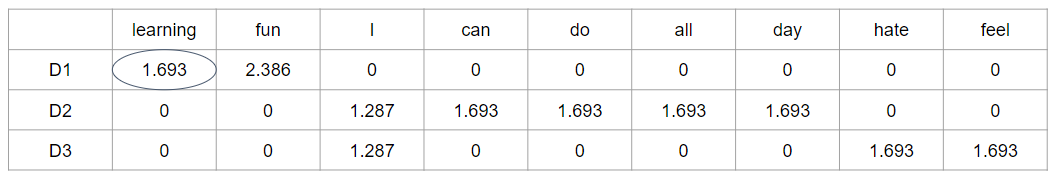

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
vect = TfidfVectorizer(ngram_range=(1,2))
vect.fit(words_example)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [57]:
print("Vocab Size: {}".format(len(vect.vocabulary_)))
print("Vocab Content: {}".format(vect.vocabulary_))

Vocab Size: 23
Vocab Content: {'you': 21, 'already': 2, 'know': 11, 'me': 14, 'don': 8, 'you already': 22, 'already know': 3, 'know me': 13, 'me don': 15, 'don you': 9, 'am': 4, 'the': 17, 'best': 6, 'there': 19, 'is': 10, 'am the': 5, 'the best': 18, 'best there': 7, 'there is': 20, 'about': 0, 'that': 16, 'know about': 12, 'about that': 1}


In [58]:
dtm_tf_idf = vect.transform(words_example)

In [59]:
dtm_tf_idf_df = pd.DataFrame(dtm_tf_idf.toarray(), columns=vect.get_feature_names())

In [60]:
dtm_tf_idf_df

,about,about that,already,already know,am,am the,best,best there,don,don you,...,know me,me,me don,that,the,the best,there,there is,you,you already
0,0.000000,0.000000,0.222008,0.222008,0.000000,0.000000,0.000000,0.000000,0.291914,0.291914,...,0.291914,0.291914,0.291914,0.000000,0.000000,0.000000,0.000000,0.000000,0.583828,0.291914
1,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.333333,0.000000,0.000000
2,0.417567,0.417567,0.317570,0.317570,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.417567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


>### Spam Detector

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
text = df['message_prep_stem']
y = np.where(df['label'] == 'spam', 1, 0)

In [63]:
text_train, text_test, y_train, y_test = train_test_split(text, y, test_size=.2)

>#### fit and transform method

In [64]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
X_test = vect.transform(text_test)

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [66]:
spam_detector = Pipeline([
    ('cvt', CountVectorizer(ngram_range=(1,2))),
    ('logit', LogisticRegression())
])

In [67]:
spam_detector.fit(text_train, y_train)

Pipeline(memory=None,
         steps=[('cvt',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logit',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                         

In [68]:
y_pred = spam_detector.predict(text_test)

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       952
           1       0.99      0.78      0.87       163

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



## Naive-Bayes

In [70]:
spam_detector_NB = Pipeline([
    ('cvt', CountVectorizer(ngram_range=(1,2))),
    ('nb', MultinomialNB())
])

In [71]:
spam_detector_NB.fit(text_train, y_train)

Pipeline(memory=None,
         steps=[('cvt',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('nb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [72]:
y_predNB = spam_detector_NB.predict(text_test)

In [73]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       952
           1       0.98      0.83      0.90       163

    accuracy                           0.97      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [74]:
from sklearn.metrics import plot_confusion_matrix

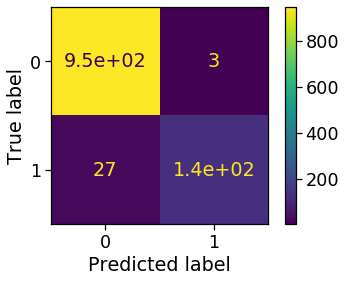

In [75]:
plot_confusion_matrix(spam_detector_NB, text_test, y_test)

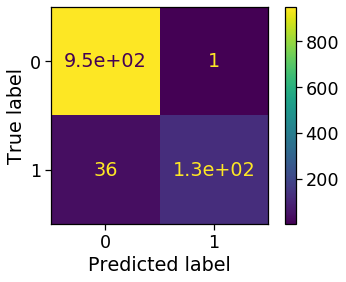

In [76]:
plot_confusion_matrix(spam_detector, text_test, y_test)

## Modelling TF-IDF

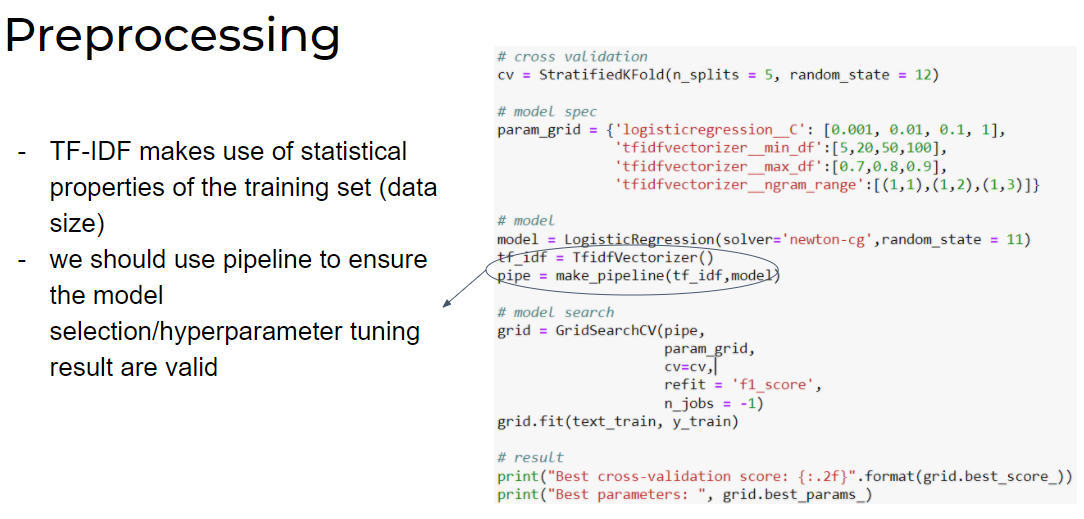

In [77]:
# df['message_prep1'] = df['message'].apply(to_lower)
# df['message_prep2'] = df['message_prep1'].apply(main_contraction)
# df['message_prep3'] = df['message_prep2'].apply(remove_numbers)
# df['message_prep4'] = df['message_prep3'].apply(remove_punct)
# df['message_prep5'] = df['message_prep4'].apply(to_strip)
# df['message_prep6'] = df['message_prep5'].apply(remove_stopwords)

df

,label,message,message_prep1,message_prep2,message_prep3,message_prep4,message_prep5,message_prep6,message_prep_stem,message_prep_lemma,length
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...","go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat,go jurong point crazi avail bugi n great world la e buffet cine got amor wat,go jurong point crazy available bugis n great world la e buffet cine got amore wat,111
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar... joking wif u oni...,ok lar joking wif u oni,ok lar joking wif u oni,ok lar joking wif oni,ok lar joke wif oni,ok lar joking wif oni,29
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&cs apply 08452810075over18s,free entry in a wkly comp to win fa cup final tkts st may . text fa to to receive entry question(std txt rate)t&cs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply overs,free entri wkli comp win fa cup final tkts st may text fa receiv entri questionstd txt ratetc appli over,free entry wkly comp win fa cup final tkts st may text fa receive entry questionstd txt ratetcs apply over,155
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor... u c already then say...,u dun say so early hor u c already then say,u dun say so early hor u c already then say,say early hor c already say,say earli hor c alreadi say,say early hor c already say,49
4,ham,"Nah I don't think he goes to usf, he lives around here though","nah i don't think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though","nah i do not think he goes to usf, he lives around here though",nah i do not think he goes to usf he lives around here though,nah i do not think he goes to usf he lives around here though,nah think goes usf lives around though,nah think goe usf live around though,nah think go usf life around though,61
...,...,...,...,...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the �750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the �750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the 2nd time we have tried 2 contact u. u have won the �750 pound prize. 2 claim is easy, call 087187272008 now1! only 10p per minute. bt-national-rate.","this is the nd time we have tried contact u. u have won the � pound prize. claim is easy, call now! o

In [78]:
def text_preprocessing(text):
    step1 = to_lower(text)
    step2 = main_contraction(step1)
    step3 = remove_numbers(step2)
    step4 = remove_punct(step3)
    step5 = to_strip(step4)
    step6 = remove_stopwords(step5)
    
    return step6

In [79]:
tf_idf_prep = TfidfVectorizer(preprocessor=text_preprocessing)

tf_idf_prep.fit(df['message'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2',
                preprocessor=<function text_preprocessing at 0x000001EF2ED77EE8>,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [80]:
coba = tf_idf_prep.transform(df['message'])
coba.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
print(tf_idf_prep.get_feature_names())

['aa', 'aah', 'aaniye', 'aaooooright', 'aathilove', 'aathiwhere', 'ab', 'abbey', 'abdomen', 'abeg', 'abel', 'aberdeen', 'abi', 'ability', 'abiola', 'abj', 'able', 'abnormally', 'aboutas', 'abroad', 'absence', 'absolutely', 'abstract', 'abt', 'abta', 'aburo', 'abuse', 'abusers', 'ac', 'academic', 'acc', 'accent', 'accenture', 'accept', 'access', 'accessible', 'accidant', 'accident', 'accidentally', 'accommodation', 'accommodationvouchers', 'accomodate', 'accomodations', 'accordin', 'accordingly', 'accordinglyor', 'account', 'accounting', 'accounts', 'accumulation', 'achanammarakheshqatar', 'ache', 'achieve', 'acid', 'acknowledgement', 'aclpm', 'acnt', 'acoentry', 'across', 'acsmsrewards', 'act', 'acted', 'actin', 'acting', 'action', 'activ', 'activate', 'active', 'activities', 'actor', 'actual', 'actually', 'acwicmbcktzr', 'ad', 'adam', 'add', 'addamsfa', 'added', 'addicted', 'addie', 'adding', 'address', 'addressull', 'adds', 'adewale', 'adi', 'adjustable', 'admin', 'administrator', 'a

In [82]:
pd.Series(tf_idf_prep.get_feature_names()).isin(stop_words).sum()

21

In [83]:
tf_idf_prep = TfidfVectorizer()
model = MultinomialNB()
pipe = Pipeline([
    ('preprocess', tf_idf_prep),
    ('model', model)
])

param_grid = {
    'model__alpha': np.linspace(0,1,10),
}

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
grid = GridSearchCV(pipe, param_grid, cv = 5)

In [86]:
grid.fit(text_train, y_train)

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'settin

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                    

In [87]:
grid.best_estimator_

Pipeline(memory=None,
         steps=[('preprocess',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=0.3333333333333333, class_prior=None,
                               fit_prior=True))],
         verbos

In [88]:
best_nb = grid.best_estimator_
best_nb.fit(text_train, y_train)
y_pred_bestNB = best_nb.predict(text_test)

In [89]:
print(classification_report(y_test, y_pred_bestNB))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       952
           1       0.99      0.80      0.88       163

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [90]:
print(classification_report(y_test, y_predNB))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       952
           1       0.98      0.83      0.90       163

    accuracy                           0.97      1115
   macro avg       0.98      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



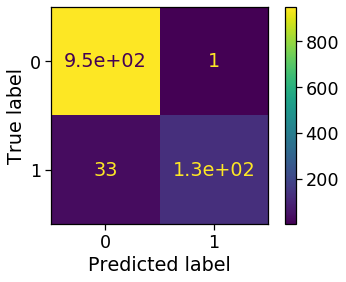

In [91]:
plot_confusion_matrix(best_nb,text_test, y_test);

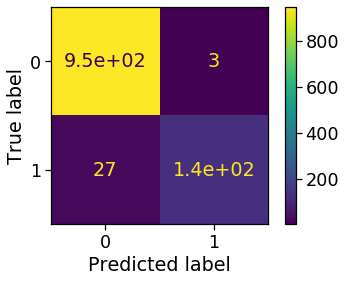

In [92]:
plot_confusion_matrix(spam_detector_NB, text_test, y_test)

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
wine = pd.read_csv('data/Data/white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


## Preprocess

In [95]:
wine.isna().sum()/len(wine)*100

fixed acidity           0.000000
volatile acidity        0.000000
citric acid             0.000000
residual sugar          0.000000
chlorides               0.000000
free sulfur dioxide     0.000000
total sulfur dioxide    0.000000
density                 0.000000
pH                      0.192308
sulphates               0.192308
alcohol                 0.192308
quality                 0.192308
dtype: float64

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-

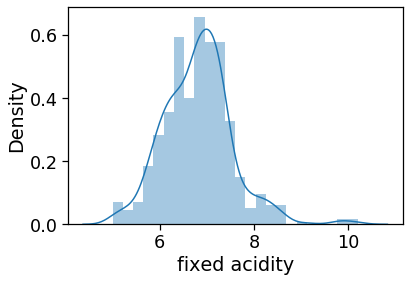

In [96]:
sns.distplot(wine['fixed acidity']);

C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-

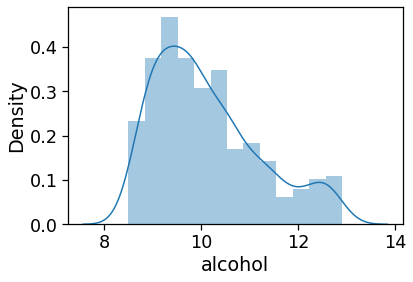

In [97]:
sns.distplot(wine['alcohol']);

In [98]:
wine['label'] = np.where(wine['quality'] > 6., 1, 0)

In [99]:
wine.dropna(inplace=True)

In [100]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
label                   0
dtype: int64

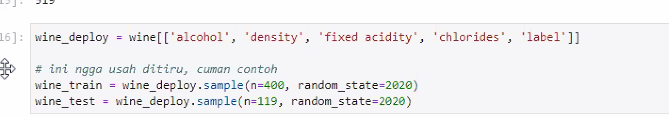

In [101]:
wine_deploy = wine[['alcohol', 'density', 'fixed acidity', 'chlorides', 'label']]

# contoh
wine_train = wine_deploy[:400]
wine_test = wine_deploy[400:]


# wine_train = wine_deploy.sample(n=400, random_state=2020)
# wine_test = wine_deploy.sample(n=119, random_state=2020)

## Model Training

In [102]:
# Basic Operations
import pandas as pd
import numpy as np

# ML Models
from sklearn.linear_model import LogisticRegression

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, KBinsDiscretizer
from sklearn.compose import ColumnTransformer

# Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

# Model
import pickle
import joblib

In [103]:
wine_train.head()

,alcohol,density,fixed acidity,chlorides,label
0,8.8,1.0010,7.0,0.045,0
1,9.5,0.9940,6.3,0.049,0
2,10.1,0.9951,8.1,0.050,0
3,9.9,0.9956,7.2,0.058,0
4,9.9,0.9956,7.2,0.058,0


In [104]:
poly = PolynomialFeatures(degree=3, include_bias=False)


transformer = ColumnTransformer([
    ('poly', poly, ['alcohol', 'density']),
    ('bin', KBinsDiscretizer(n_bins=3, encode='onehot', strategy='quantile'), ['fixed acidity', 'chlorides'])
])

In [105]:
X = wine_train.drop('label', axis=1)
y = wine_train['label']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, stratify=y, random_state=2020)

model = LogisticRegression(random_state=2020)

estimator = Pipeline([
    ('preprocess', transformer),
    ('clf', model)
])

In [111]:
hyperparam_space = {
    'clf__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'clf__solver': ['liblinear', 'newton-cg']
}

skfold = StratifiedKFold(n_splits=5)

grid = GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = skfold,
    scoring = 'f1',
    n_jobs=1,
    verbose=1
)
grid.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\scipy\optimize\linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\miniconda3\envs\ml_dl\lib\site-packages\scipy\optimize\linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\miniconda3\e

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('poly',
                                                                         PolynomialFeatures(degree=3,
                                                                                            include_bias=False,
                                                                                            interaction_only=False,
                                                                      

In [ ]:
logit_tuned

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logit_tune.predict(X_test)))

NameError: name 'logit_tune' is not defined

## Pickle Save

In [ ]:
filename = 'logit_final.sav'
pickle.dump(logit_tuned, open(filename, 'wb'))

## Pickle Load

In [108]:
# front-end
alcohol = float(input('Berapa kadar alkoholnya? (8.5 - 12.8): '))
density = float(input('Berapa kepekatannya?(0.99 - 1.0033): '))
acidity_level = input('tingkat keasaman?(5.0 - 10.2): ')
chlorides_level = input('tingkat chlorides?(0.02 - 0.2): ')

#back-end
df = pd.DataFrame([[alcohol, density, acidity_level, chlorides_level]], columns=X_train_val.columns, index=[0])
class_label = loaded_model.predict(df)[0]
proba = loaded_model.predict_proba(df)

if class_label == 0:
    print('Low Quality')
else:
    print('High Quality')
    
print(proba)

Berapa kadar alkoholnya? (8.5 - 12.8): df


ValueError: could not convert string to float: 'df'